# **Практическая работа №7. Использование автоэнкодера для решения задач семантической сегментации. Часть 1**

# Этап 1. Выбор и обработка исходных данных. Разделение на обучающую и тестовую выборку

# Разделение данных по папкам на обучающую и проверочную выборку 


Ниже представлен Код для разделения папки на train и val.
После создания новых папок переименуйте их и расположите в формате, приведенном ниже, для использования для семантической сегментации с помощью генераторов данных. 

[Документация](https://pypi.org/project/split-folders/) 

### Подсказка

In [1]:
%pip install split-folders
%pip install patchify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
from PIL import Image
import cv2
from patchify import patchify
import numpy as np

In [3]:
root_directory = r'C:\Users\User\Documents\GitHub\NeuralNetworkExercises\Exercise7\data\Semantic segmentation dataset'
patch_size = 256

In [17]:
image_dataset = []  
for path, subdirs, files in os.walk(root_directory):
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'images':   
        images = os.listdir(path)
        for i, image_name in enumerate(images):  
            if image_name.endswith(".jpg"):   
                image = cv2.imread(os.path.join(path, image_name), 1)  
                SIZE_X = (image.shape[1]//patch_size)*patch_size 
                SIZE_Y = (image.shape[0]//patch_size)*patch_size  
                image = image[0:SIZE_X, 0:SIZE_Y]
       
                patches_img = patchify(image, (patch_size, patch_size, 3), step=patch_size)
        
                for i in range(patches_img.shape[0]):
                    for j in range(patches_img.shape[1]):
                        
                        single_patch_img = patches_img[i,j,:,:]
                        single_patch_img = single_patch_img[0]

                        tile_name = path.split(os.path.sep)[-2].replace(' ', '_')                             
                        patch_filename =  os.path.splitext(image_name)[0] + f'_{tile_name}' + "_patch_" + str(i) + '_' + str(j) + ".jpg"
                        patch_path = os.path.join(root_directory, "Images", patch_filename)
                        cv2.imwrite(patch_path, single_patch_img)


In [16]:
mask_dataset = []  
for path, subdirs, files in os.walk(root_directory):
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'masks': 
        masks = os.listdir(path) 
    
        for i, mask_name in enumerate(masks):  
            if mask_name.endswith(".png"):  
               
                mask = cv2.imread(os.path.join(path, mask_name), 1)
                SIZE_X = (mask.shape[1]//patch_size)*patch_size
                SIZE_Y = (mask.shape[0]//patch_size)*patch_size
                mask = mask[0:SIZE_X, 0:SIZE_Y]
                patches_mask = patchify(mask, (patch_size, patch_size, 3), step=patch_size)
        
                for i in range(patches_mask.shape[0]):
                    for j in range(patches_mask.shape[1]):
                        
                        single_patch_mask = patches_mask[i,j,:,:]
                        single_patch_mask = single_patch_mask[0]

                        tile_name = path.split(os.path.sep)[-2].replace(' ', '_')                             
                        patch_filename =  os.path.splitext(mask_name)[0] + f'_{tile_name}' + "_patch_" + str(i) + '_' + str(j) + ".png"
                        patch_path = os.path.join(root_directory, "Masks", patch_filename)
                        cv2.imwrite(patch_path, single_patch_mask)


In [18]:
import splitfolders  # or import split_folders

input_folder = r'C:\Users\User\Documents\GitHub\NeuralNetworkExercises\Exercise7\data\Semantic segmentation dataset'
output_folder = r'C:\Users\User\Documents\GitHub\NeuralNetworkExercises\Exercise7\data\data_for_training_and_testing'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values

Copying files: 2106 files [00:09, 219.76 files/s]


Структура конечных папок для генератора (ImageDataGenerator()): 

(После разделения на папки, нужно разместить вручную или написать для этого специальную функцию, например, используя модуль shutil)



```
dataset
        train_image
                    train
        train_mask
                    train
        val_image
                    val
        val_mask
                    val
```



#.

In [22]:
for root, dirs, files in os.walk('./data'):
    level = root.replace('./data', '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))
    subindent = ' ' * 4 * (level + 1)
    if len(files) == 0:
        continue

    print('{}{} files'.format(subindent, len(files)))

data/
    train_image/
        train/
            789 files
    train_mask/
        train/
            789 files
    val_image/
        val/
            264 files
    val_mask/
        val/
            264 files


In [ ]:
train_img_dir = r'.\data\train_image\train'
train_mask_dir = r'.\data\train_mask\train'

img_list = sorted(os.listdir(train_img_dir))
msk_list = sorted(os.listdir(train_mask_dir))

num_images = len(os.listdir(train_img_dir))

<Figure size 1200x800 with 0 Axes>

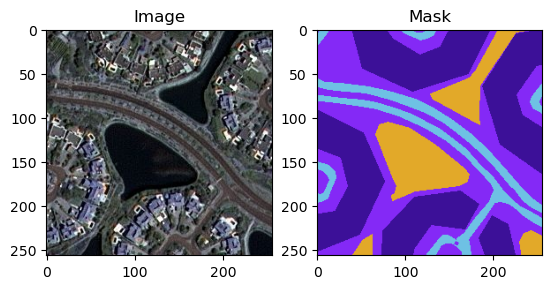

<Figure size 1200x800 with 0 Axes>

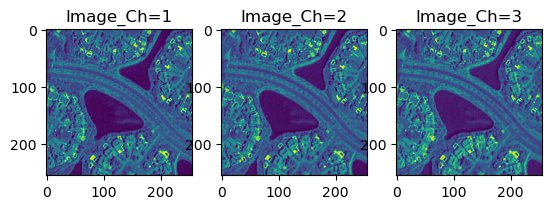

<Figure size 1200x800 with 0 Axes>

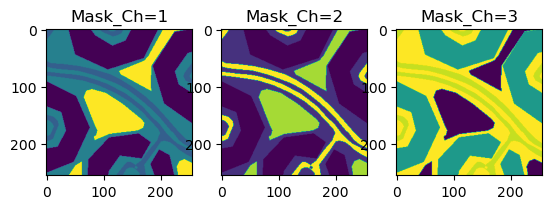

In [28]:
import random
from matplotlib import pyplot as plt

img_num = random.randint(0, num_images-1)

img_for_plot = cv2.imread(os.path.join(train_img_dir, img_list[img_num]))
img_for_plot = cv2.cvtColor(img_for_plot, cv2.COLOR_BGR2RGB)

mask_for_plot =cv2.imread(os.path.join(train_mask_dir, msk_list[img_num]))
mask_for_plot = cv2.cvtColor(mask_for_plot, cv2.COLOR_BGR2RGB)

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
 
figure, axis = plt.subplots(1, 2)

axis[0].imshow(img_for_plot, cmap=plt.get_cmap('gray'),vmin=0,vmax=100)
axis[0].set_title('Image')

axis[1].imshow(mask_for_plot)
axis[1].set_title('Mask')

plt.show()

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
 
figure, axis = plt.subplots(1, 3)

axis[0].imshow(img_for_plot[:,:,0])
axis[0].set_title('Image_Ch=1')

axis[1].imshow(img_for_plot[:,:,1])
axis[1].set_title('Image_Ch=2')

axis[2].imshow(img_for_plot[:,:,2])
axis[2].set_title('Image_Ch=3')

# Combine all the operations and display
plt.show()

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
 
figure, axis = plt.subplots(1, 3)

axis[0].imshow(mask_for_plot[:,:,0])
axis[0].set_title("Mask_Ch=1")

axis[1].imshow(mask_for_plot[:,:,1])
axis[1].set_title("Mask_Ch=2")

axis[2].imshow(mask_for_plot[:,:,2])
axis[2].set_title("Mask_Ch=3")

plt.show()


# Этап 2. Предобработка обучающей и валидационной выборки. Разработка архитектуры модели

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import segmentation_models as sm
from keras.metrics import MeanIoU
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler, StandardScaler


Segmentation Models: using `keras` framework.


In [2]:

Building = np.array((60, 16, 152))
Land = np.array((132, 41, 246))
Road = np.array((110, 193, 228))
Vegetation = np.array((254, 221, 58))
Water = np.array((226, 169, 41))
Unlabeled = np.array((155, 155, 155))


In [4]:
def rgb_to_2D_label(label):
    if len(label.shape) == 3: 
        label = label[:,:,:3]
    if len(label.shape) == 4: 
        label = label[:,:,:,:3]

    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == Building,axis=-1)] = 0
    label_seg [np.all(label==Land,axis=-1)] = 1
    label_seg [np.all(label==Road,axis=-1)] = 2
    label_seg [np.all(label==Vegetation,axis=-1)] = 3
    label_seg [np.all(label==Water,axis=-1)] = 4
    label_seg [np.all(label==Unlabeled,axis=-1)] = 5


    if len(label.shape) == 3: 
        label_seg = label_seg[:,:,0]
    if len(label.shape) == 4: 
        label_seg = label_seg[:,:,:,0]
        
    return label_seg

scaler = MinMaxScaler()
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

def preprocess_data(img, mask, num_class):
    img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    img = preprocess_input(img) 
    mask = rgb_to_2D_label(mask)
    mask = to_categorical(mask, num_class)
      
    return (img, mask)

In [5]:
seed=24
batch_size= 16
n_classes=6

In [7]:
from keras.preprocessing.image import ImageDataGenerator
def trainGenerator(train_img_path, train_mask_path, num_class):
    
    img_data_gen_args = dict(horizontal_flip=True,
                      vertical_flip=True)
    
    image_datagen = ImageDataGenerator(**img_data_gen_args)
    mask_datagen = ImageDataGenerator(**img_data_gen_args)
    
    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    train_generator = zip(image_generator, mask_generator)
    
    for (img, mask) in train_generator:
        img, mask = preprocess_data(img, mask, num_class)
        yield (img, mask)

In [8]:
train_img_path = r'.\data\train_image'
train_mask_path = r'.\data\train_mask'
train_img_gen = trainGenerator(train_img_path, train_mask_path, num_class=6)

val_img_path = r'.\data\val_image'
val_mask_path = r'.\data\val_mask'
val_img_gen = trainGenerator(val_img_path, val_mask_path, num_class=6)

In [9]:
num_train_imgs = len(os.listdir(r'.\data\train_image\train'))
num_val_images = len(os.listdir(r'.\data\val_image\val'))

steps_per_epoch = num_train_imgs//batch_size
val_steps_per_epoch = num_val_images//batch_size


# Этап 3. Обучение модели

* Изучите техническую докуентацию по работе с модулем [Segmentation Models](https://segmentation-models.readthedocs.io/en/latest/tutorial.html)

* Последовательно обучите несколько моделей, используя при этом разные [функции потерь ](https://segmentation-models.readthedocs.io/en/latest/api.html#losses)

> [Реализация всех имеющихся в модуле функций потерь на GIT разработчиков](https://github.com/qubvel/segmentation_models/blob/master/segmentation_models/losses.py)

* При обучении используйте несколько метрик [метрик](https://segmentation-models.readthedocs.io/en/latest/api.html#metrics), определив их в массиве.



Пример:

```
metrics = ['accuracy', sm.metrics.iou_score]

model.compile('Adam', loss=sm.losses.categorical_focal_jaccard_loss, metrics=metrics)
```
> [Реализация всех имеющихся в модуле метрик на GIT разработчиков](https://github.com/qubvel/segmentation_models/blob/master/segmentation_models/metrics.py)



## Модель 1
Функция потерь **Сategorical Focal Jaccard Loss**

In [20]:
metrics = ['accuracy', sm.metrics.iou_score, sm.metrics.FScore()]
model_1 = sm.Unet(BACKBONE, encoder_weights='imagenet', classes=n_classes, activation='softmax')

model_1.compile(optimizer='adam', loss=sm.losses.categorical_focal_jaccard_loss, metrics=metrics)
model_1.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d_136 (ZeroPaddin  (None, None, None,   0          ['bn_data[0][0]']                
 g2D)                           3)                                                          

In [21]:
history_1=model_1.fit(
          train_img_gen,
          steps_per_epoch=steps_per_epoch,
          epochs=100,
          verbose=1,
          validation_steps=val_steps_per_epoch,
          validation_data=val_img_gen)

Found 789 images belonging to 1 classes.
Found 789 images belonging to 1 classes.
Epoch 1/100
49/49 [==============================] - ETA: 0s - loss: 0.7288 - accuracy: 0.6773 - iou_score: 0.3062 - f1-score: 0.4083Found 264 images belonging to 1 classes.
Found 264 images belonging to 1 classes.
49/49 [==============================] - 36s 509ms/step - loss: 0.7288 - accuracy: 0.6773 - iou_score: 0.3062 - f1-score: 0.4083 - val_loss: 1.3285 - val_accuracy: 0.3589 - val_iou_score: 0.0850 - val_f1-score: 0.1312
Epoch 2/100
49/49 [==============================] - 16s 314ms/step - loss: 0.5847 - accuracy: 0.7810 - iou_score: 0.4539 - f1-score: 0.5683 - val_loss: 1.3561 - val_accuracy: 0.1193 - val_iou_score: 0.0212 - val_f1-score: 0.0375
Epoch 3/100
49/49 [==============================] - 15s 317ms/step - loss: 0.5525 - accuracy: 0.8013 - iou_score: 0.4818 - f1-score: 0.5950 - val_loss: 0.9903 - val_accuracy: 0.5528 - val_iou_score: 0.0959 - val_f1-score: 0.1287
Epoch 4/100
49/49 [======

## Модель 2
Функция потерь **Categorical CE Loss**

In [76]:
metrics = ['accuracy', sm.metrics.iou_score, sm.metrics.FScore()]
model_2 = sm.Unet(BACKBONE, encoder_weights='imagenet', classes=n_classes, activation='softmax')

model_2.compile(optimizer='adam', loss=sm.losses.CategoricalCELoss(), metrics=metrics)
model_2.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d_170 (ZeroPaddin  (None, None, None,   0          ['bn_data[0][0]']                
 g2D)                           3)                                                         

In [77]:
history_2=model_2.fit(
          train_img_gen,
          steps_per_epoch=steps_per_epoch,
          epochs=100,
          verbose=1,
          validation_steps=val_steps_per_epoch,
          validation_data=val_img_gen)

Epoch 1/100
49/49 [==============================] - 19s 317ms/step - loss: 0.1603 - accuracy: 0.6707 - iou_score: 0.2285 - f1-score: 0.3277 - val_loss: 1.9902 - val_accuracy: 0.1591 - val_iou_score: 0.0357 - val_f1-score: 0.0639
Epoch 2/100
49/49 [==============================] - 15s 310ms/step - loss: 0.1089 - accuracy: 0.7859 - iou_score: 0.3525 - f1-score: 0.4747 - val_loss: 0.3445 - val_accuracy: 0.1250 - val_iou_score: 0.0617 - val_f1-score: 0.1123
Epoch 3/100
49/49 [==============================] - 25s 515ms/step - loss: 0.1032 - accuracy: 0.7929 - iou_score: 0.3695 - f1-score: 0.4926 - val_loss: 0.2669 - val_accuracy: 0.1729 - val_iou_score: 0.0829 - val_f1-score: 0.1398
Epoch 4/100
49/49 [==============================] - 33s 673ms/step - loss: 0.0936 - accuracy: 0.8125 - iou_score: 0.4025 - f1-score: 0.5249 - val_loss: 0.2492 - val_accuracy: 0.5631 - val_iou_score: 0.1033 - val_f1-score: 0.1530
Epoch 5/100
49/49 [==============================] - 16s 327ms/step - loss: 0.09

## Модель 3
Функция потерь **Categorical Focal Dice Loss**

In [79]:
metrics = ['accuracy', sm.metrics.iou_score, sm.metrics.FScore()]
model_3 = sm.Unet(BACKBONE, encoder_weights='imagenet', classes=n_classes, activation='softmax')

model_3.compile(optimizer='adam', loss=sm.losses.categorical_focal_dice_loss, metrics=metrics)
model_3.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d_204 (ZeroPaddin  (None, None, None,   0          ['bn_data[0][0]']                
 g2D)                           3)                                                         

In [80]:
history_3=model_3.fit(
          train_img_gen,
          steps_per_epoch=steps_per_epoch,
          epochs=100,
          verbose=1,
          validation_steps=val_steps_per_epoch,
          validation_data=val_img_gen)

Epoch 1/100
49/49 [==============================] - 19s 316ms/step - loss: 0.5820 - accuracy: 0.7041 - iou_score: 0.3330 - f1-score: 0.4488 - val_loss: 1.5348 - val_accuracy: 0.1282 - val_iou_score: 0.0256 - val_f1-score: 0.0467
Epoch 2/100
49/49 [==============================] - 15s 298ms/step - loss: 0.4400 - accuracy: 0.7965 - iou_score: 0.4770 - f1-score: 0.5928 - val_loss: 1.0353 - val_accuracy: 0.3948 - val_iou_score: 0.0890 - val_f1-score: 0.1348
Epoch 3/100
49/49 [==============================] - 15s 301ms/step - loss: 0.4248 - accuracy: 0.8085 - iou_score: 0.4945 - f1-score: 0.6082 - val_loss: 1.0515 - val_accuracy: 0.5553 - val_iou_score: 0.0967 - val_f1-score: 0.1279
Epoch 4/100
49/49 [==============================] - 15s 308ms/step - loss: 0.4373 - accuracy: 0.8010 - iou_score: 0.4842 - f1-score: 0.5975 - val_loss: 0.9271 - val_accuracy: 0.5547 - val_iou_score: 0.0973 - val_f1-score: 0.1405
Epoch 5/100
49/49 [==============================] - 15s 302ms/step - loss: 0.40

In [81]:
model_1.save('.\models\Model1.h5')
model_2.save('.\models\Model2.h5')
model_3.save('.\models\Model3.h5')

# Этап 4. Визуализация процесса обучения. Оценка точности

In [74]:
def display_training(history, name):
    fig, axs = plt.subplots(4, 1, sharex=True)
    
    fig.set_figwidth(15)
    fig.set_figheight(15)
    fig.suptitle(name)
    plt.xlabel('Epochs', fontsize=10)
    
    axs[0].set_title("Training and validation loss")
    axs[0].plot(history.history['loss'])
    axs[0].plot(history.history['val_loss'])
    axs[0].set_ylabel('Loss')
    axs[0].legend(['Training loss', 'Validation loss'], loc="upper right")

    axs[1].set_title("Training and validation accuracy")
    axs[1].plot(history.history['accuracy'])
    axs[1].plot(history.history['val_accuracy'])
    axs[1].set_ylabel('Accuracy')
    axs[1].legend(['Training accuracy', 'Validation accuracy'], loc="lower right")

    axs[2].set_title("Training and validation IOU score")
    axs[2].plot(history.history['iou_score'])
    axs[2].plot(history.history['val_iou_score'])
    axs[2].set_ylabel('IOU score')
    axs[2].legend(['Training IOU score', 'Validation IOU score'], loc="lower right")

    axs[3].set_title("Training and validation F1 score")
    axs[3].plot(history.history['f1-score'])
    axs[3].plot(history.history['val_f1-score'])
    axs[3].set_ylabel('F1 score')
    _  = axs[3].legend(['Training F1 score', 'Validation F1 score'], loc="lower right")

    fig.subplots_adjust(bottom=0.1, top=0.95)


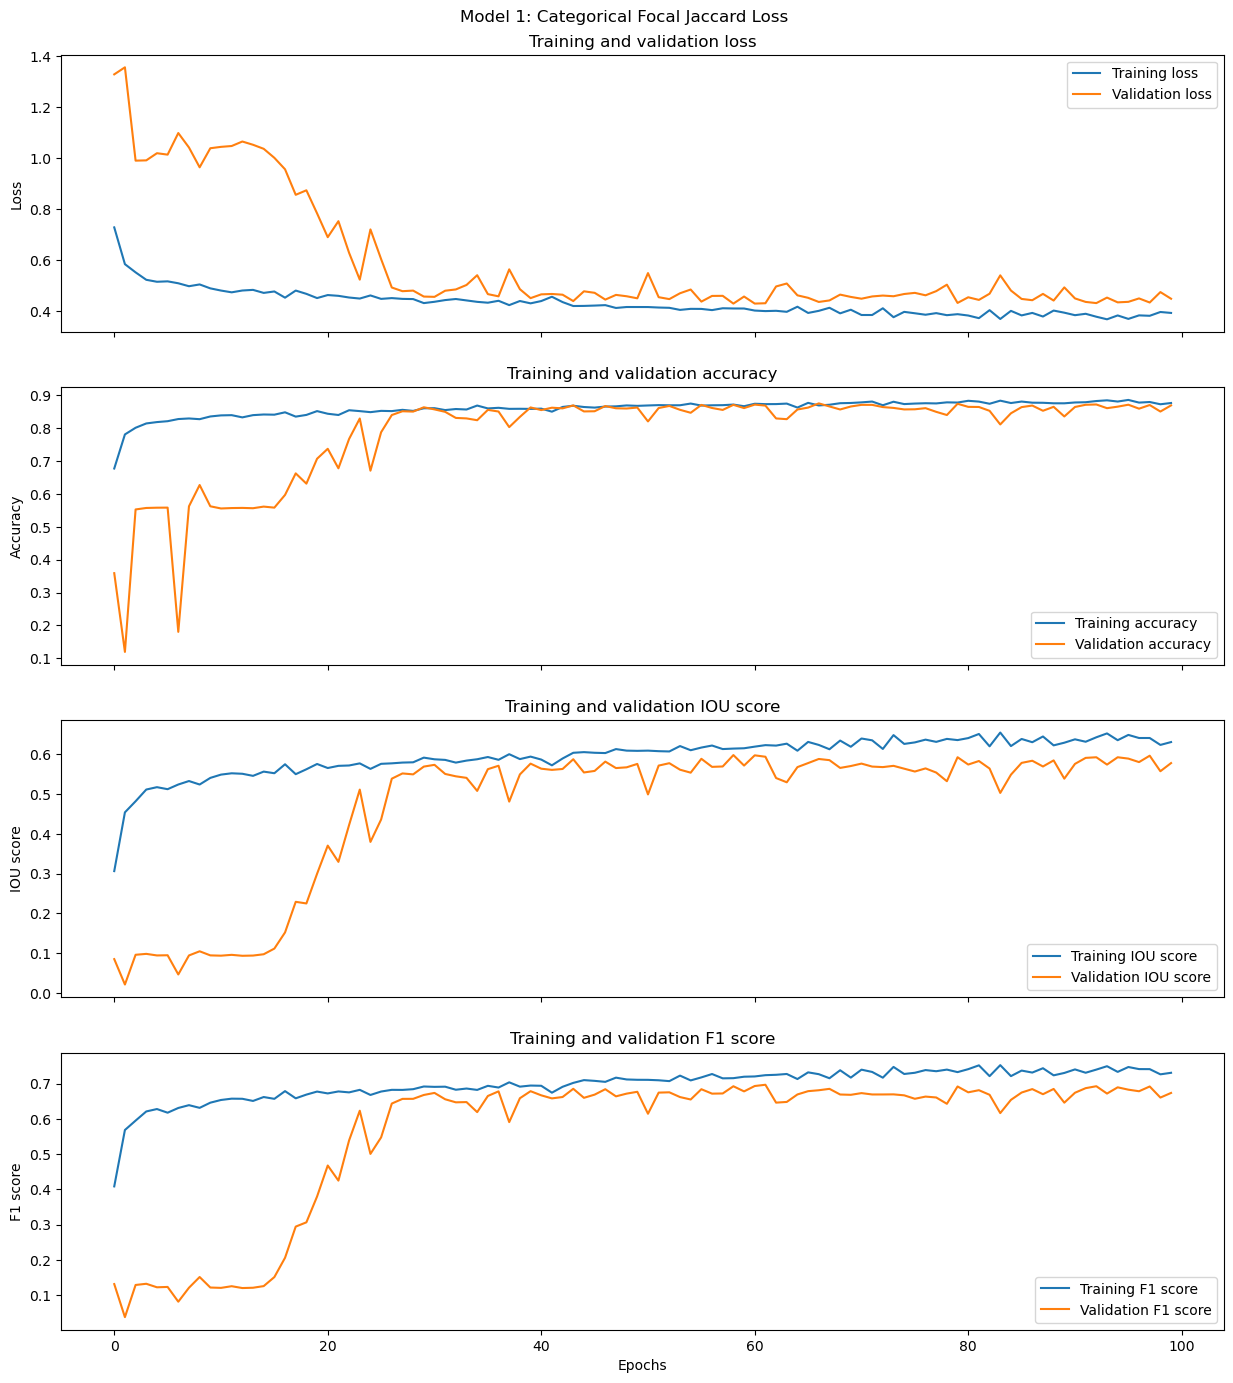

In [75]:
# Визуализация обучения модели 1
display_training(history_1, 'Model 1: Сategorical Focal Jaccard Loss')

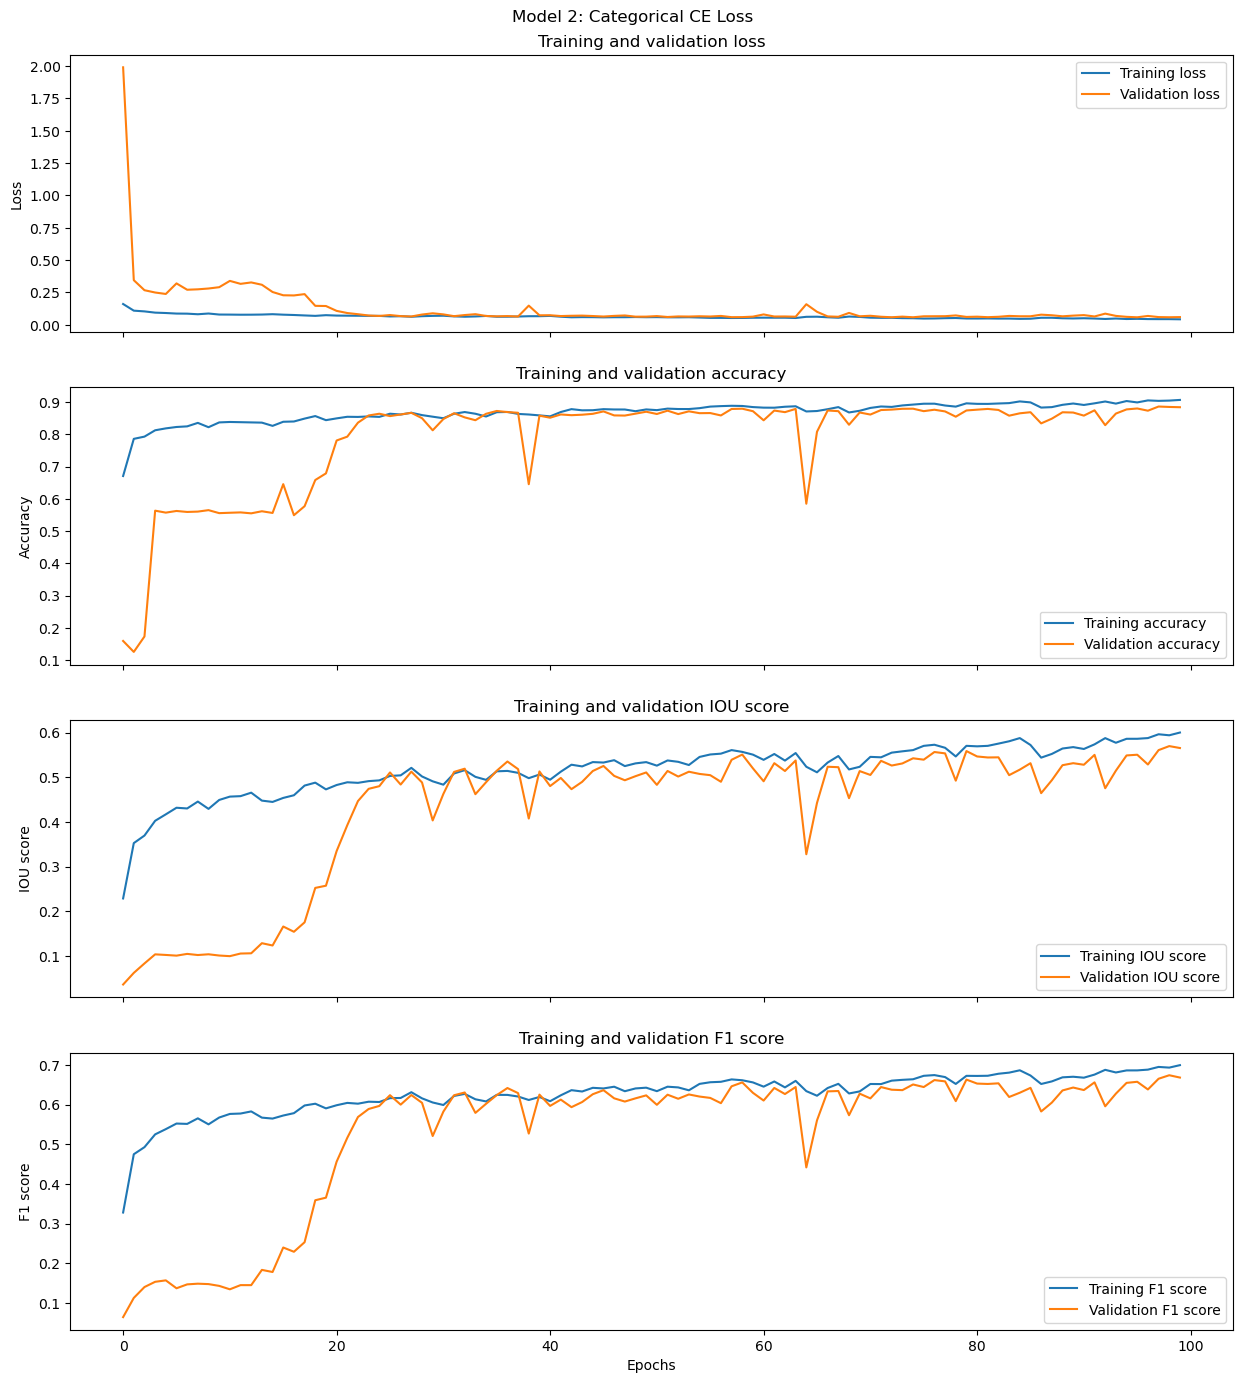

In [78]:
# Визуализация обучения модели 2
display_training(history_2, 'Model 2: Categorical CE Loss')

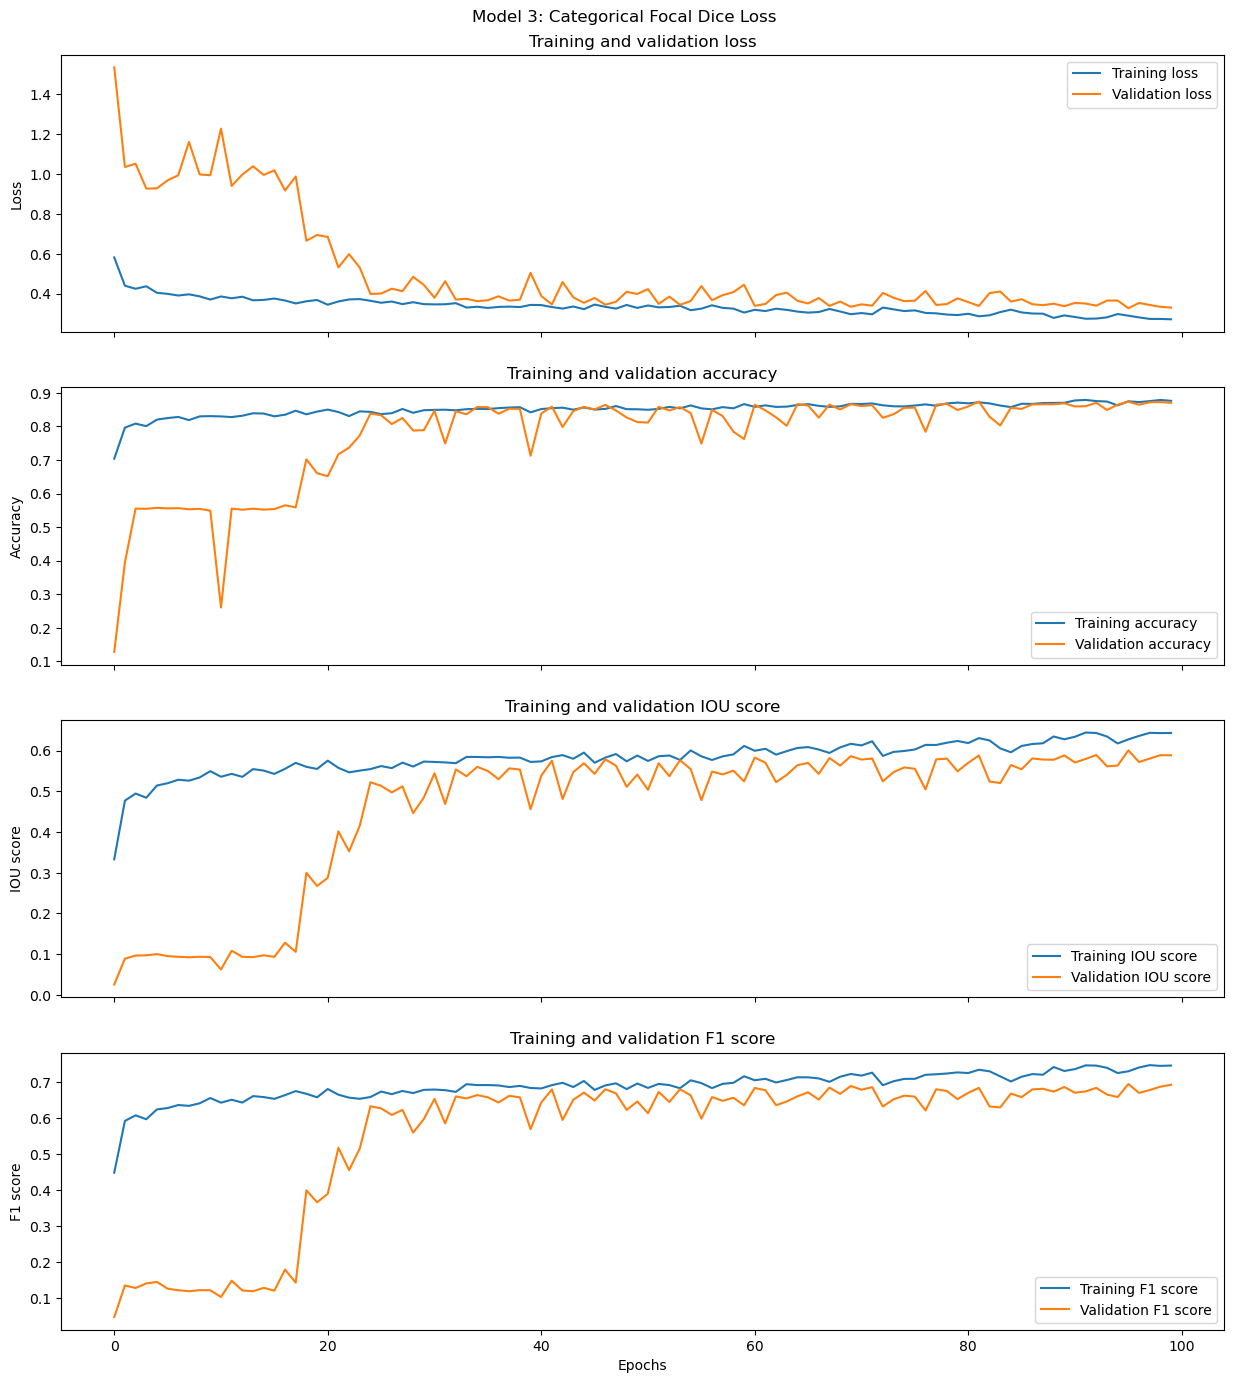

In [82]:
# Визуализация обучения модели 3
display_training(history_3, 'Model 3: Categorical Focal Dice Loss')

In [22]:
# Оценка моделей
from keras.models import load_model

metrics = ['accuracy', sm.metrics.iou_score, sm.metrics.FScore()]
model_1 = load_model('.\models\Model1.h5', compile=False)
model_1.compile(metrics=metrics)
test_pred_model_1 = model_1.evaluate(val_img_gen, steps=num_val_images)

model_2 = load_model('.\models\Model2.h5', compile=False)
model_2.compile(metrics=metrics)
test_pred_model_2 = model_2.evaluate(val_img_gen, steps=num_val_images)

model_3 = load_model('.\models\Model3.h5', compile=False)
model_3.compile(metrics=metrics)
test_pred_model_3 = model_3.evaluate(val_img_gen, steps=num_val_images)

264/264 [==============================] - 89s 337ms/step - loss: 0.0000e+00 - accuracy: 0.8696 - iou_score: 0.5889 - f1-score: 0.6928


In [23]:
def print_model_evaluation(model_name, pred):
    print(f'Evaluation of {model_name}')
    print(F"Mean Accuracy = {pred[1]}") 
    print(F"Mean IOU = {pred[2]}") 
    print(F"Mean FScore = {pred[3]}") 
    print()


print_model_evaluation('Model 1: Сategorical Focal Jaccard Loss', test_pred_model_1)
print_model_evaluation('Model 2: Categorical CE Loss', test_pred_model_2)
print_model_evaluation('Model 3: Categorical Focal Dice Loss', test_pred_model_3)

Evaluation of Model 1: Сategorical Focal Jaccard Loss
Mean Accuracy = 0.8704467415809631
Mean IOU = 0.582932710647583
Mean FScore = 0.6784207820892334

Evaluation of Model 2: Categorical CE Loss
Mean Accuracy = 0.88238126039505
Mean IOU = 0.5542926788330078
Mean FScore = 0.659888744354248

Evaluation of Model 3: Categorical Focal Dice Loss
Mean Accuracy = 0.869576632976532
Mean IOU = 0.5888667106628418
Mean FScore = 0.6927680969238281



In [24]:
# Отображение результатов

test_image_batch, test_mask_batch = val_img_gen.__next__()
test_mask_batch_argmax = np.argmax(test_mask_batch, axis=3) 

test_pred_batch_model_1 = model_1.predict(test_image_batch)
test_pred_batch_model_2 = model_2.predict(test_image_batch)
test_pred_batch_model_3 = model_3.predict(test_image_batch)

test_pred_batch_model_1_argmax = np.argmax(test_pred_batch_model_1, axis=3)
test_pred_batch_model_2_argmax = np.argmax(test_pred_batch_model_2, axis=3)
test_pred_batch_model_3_argmax = np.argmax(test_pred_batch_model_3, axis=3)

1/1 [==============================] - 0s 415ms/step


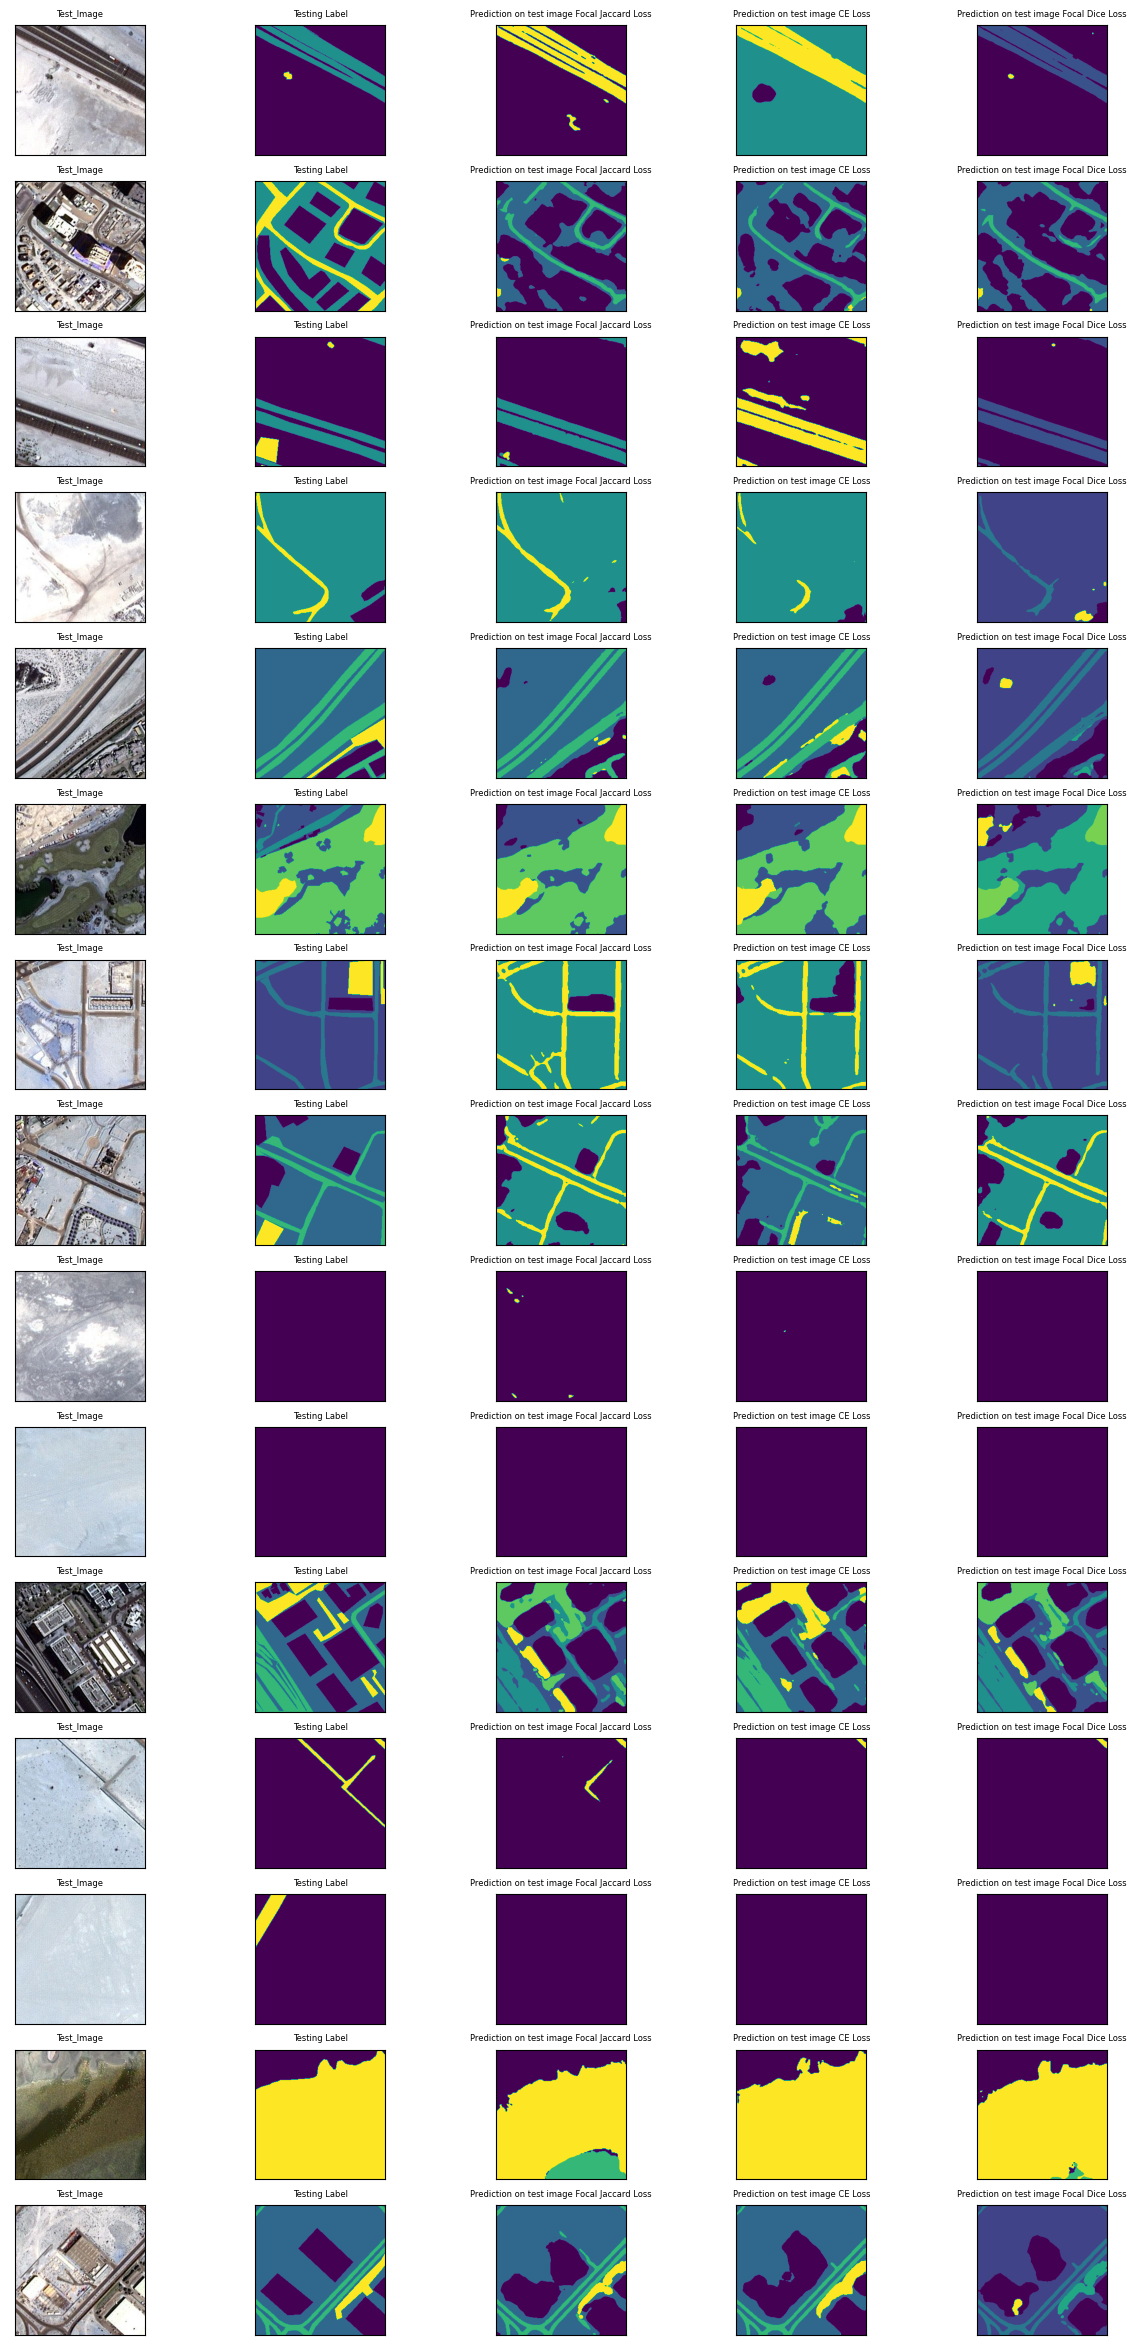

In [25]:
fig, axis = plt.subplots(test_image_batch.shape[0]-1, 5)
fig.set_figwidth(15)
fig.set_figheight(30)

for img_num in range(test_image_batch.shape[0]-1):   
    
    axis[img_num][0].imshow(test_image_batch[img_num])
    axis[img_num][0].set_title('Test_Image', fontsize = 6)
    axis[img_num][0].axes.xaxis.set_visible(False)
    axis[img_num][0].axes.yaxis.set_visible(False)


    axis[img_num][1].imshow(test_mask_batch_argmax[img_num])
    axis[img_num][1].set_title("Testing Label", fontsize = 6)
    axis[img_num][1].axes.xaxis.set_visible(False)
    axis[img_num][1].axes.yaxis.set_visible(False)

    axis[img_num][2].imshow(test_pred_batch_model_1_argmax[img_num])
    axis[img_num][2].set_title("Prediction on test image Focal Jaccard Loss", fontsize = 6)
    axis[img_num][2].axes.xaxis.set_visible(False)
    axis[img_num][2].axes.yaxis.set_visible(False)

    axis[img_num][3].imshow(test_pred_batch_model_2_argmax[img_num])
    axis[img_num][3].set_title("Prediction on test image CE Loss", fontsize = 6)
    axis[img_num][3].axes.xaxis.set_visible(False)
    axis[img_num][3].axes.yaxis.set_visible(False)

    axis[img_num][4].imshow(test_pred_batch_model_3_argmax[img_num])
    axis[img_num][4].set_title("Prediction on test image Focal Dice Loss", fontsize = 6)
    axis[img_num][4].axes.xaxis.set_visible(False)
    axis[img_num][4].axes.yaxis.set_visible(False)
    
plt.show()
